# Google Play Store Analysis

I got this dataset from kaggle. You can find it here: https://www.kaggle.com/lava18/google-play-store-apps , In this project I try to implement my knowldge about python, numpy, pandas, matplotlib and seaborn.
I learnde this things from this course website: https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas

## Downloading the Dataset

**TODO** - Download googleplaystore.csv from  https://www.kaggle.com/lava18/google-play-store-apps and then Run sell below.

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
project_name = "google-play-store" 

## Data Preparation and Cleaning

**TODO** - In this step we look at the dataset and then we will handle missing values and do some othe processing.



In [2]:
# Upload downloaded csv file.
from google.colab import files
uploaded = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [3]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
df = pd.read_csv('googleplaystore.csv')

In [4]:
df.head() # See first five rows of data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.columns # Get columns Name

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.shape # Data has 10841 Rows and 13 columns

(10841, 13)

## Handaling Missing Values 

*   Check How many null values are ther in each columns.
*   Diced from wich method you want to replace it.



In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
df.drop('Current Ver', inplace= True,axis =1) # We do want to genret insigts from Current Ver, Hence we prefer to drop it.  

We can Drop null values of Type, Content Rating and Android Ver as they have less missing values.

### So Droping them Don't do a megere effect on size of dataset.

In [9]:
drop_columns = ['Type', 'Content Rating', 'Android Ver']
df.dropna(axis=0, subset= drop_columns, inplace=True)

In [10]:
df.shape

(10837, 12)

In [11]:
df.isnull().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Android Ver          0
dtype: int64

## Here, Rating values have **1473** missing values. Means from **10837** values about **13.59%** values are missing in Rating columns.

### Here, it is not advisable to drop missing values as we have large missing values.
### Because if we drop null values **We will losse many information of data.**
### So it is better to **replace** it with ***mean/ median/ mode***


In [12]:
import numpy as np
df['Rating'].fillna(value=np.mean(df['Rating']), inplace=True) 

# Now see there is any null value left
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Android Ver       0
dtype: int64

In [13]:
df.dtypes 

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Android Ver        object
dtype: object

### Here Object Type columns like **Reviews**, **Price**, **Size**, **Installs** are actully contains ***Numerical*** Values  So We should convert it to Numerical Values.

In [14]:
df['Price'] = df.Price.str.replace('$','').astype('float64')
df['Size'] = df['Size'].replace('Varies with device','0')
df['Size'] = df['Size'].str.replace('k','000')                # Here in Size columns every value replaced-
df['Size'] = df['Size'].str.replace('M','000000')             # -in Bytes.
df['Size']=df.Size.astype('float64')

df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')
df['Installs'] = df.Installs.astype('float64')

df['Reviews'] = df['Reviews'].astype('float64')

### Now Change Data Type of ***Last Updated*** From Object --> DatTime64

In [15]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [16]:
df.dtypes  # Now we got our desired data-types

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                 float64
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Android Ver               object
dtype: object

In [17]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159.00,"19,000,000.00","10,000.00",Free,0.00,Everyone,Art & Design,2018-01-07,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967.00,"14,000,000.00","500,000.00",Free,0.00,Everyone,Art & Design;Pretend Play,2018-01-15,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,"87,510.00",8.70,"5,000,000.00",Free,0.00,Everyone,Art & Design,2018-08-01,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,"215,644.00","25,000,000.00","50,000,000.00",Free,0.00,Teen,Art & Design,2018-06-08,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967.00,2.80,"100,000.00",Free,0.00,Everyone,Art & Design;Creativity,2018-06-20,4.4 and up


## Exploratory Analysis and Visualization

**TODO** - In this we will explore the data with mean, sum, range and with charts.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

See Interesting Statictic of Numerical Columns with **Describe**()

In [21]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,"10,837.00","10,837.00","10,837.00","10,837.00","10,837.00"
mean,4.19,"444,275.81","16,519,799.92","15,468,618.85",1.03
std,0.48,"2,928,156.54","23,202,472.13","85,040,741.78",15.95
min,1.00,0.00,0.00,0.00,0.00
25%,4.10,38.00,3.10,"5,000.00",0.00
50%,4.20,"2,094.00","269,000.00","100,000.00",0.00
75%,4.50,"54,798.00","26,000,000.00","5,000,000.00",0.00
max,5.00,"78,158,306.00","100,000,000.00","1,000,000,000.00",400.00


## Count:  Tells there is no missing values in Numerical values

## Rating is given in the range of 5 
as (1) --> Very Poor
   (2) --> Poor
   (3) --> Average
   (4) --> Good
   (5) --> Excellent

## Maximum Prize of an app is 400.
### Prize suggest that 75% of the apps are Free. As third quntile is zero.

### Size of App is looking Horribly Learge, But this values are in **Bytes**

*   1000000 bytes = 1 MB
*   1000 bytes    = 1 kB


### Installs have min value 0.
--> That's suggests no person in the world have installed it.


Graph the **'Rating'** column with **countplot**.
countplot is helpful in **EDA**.

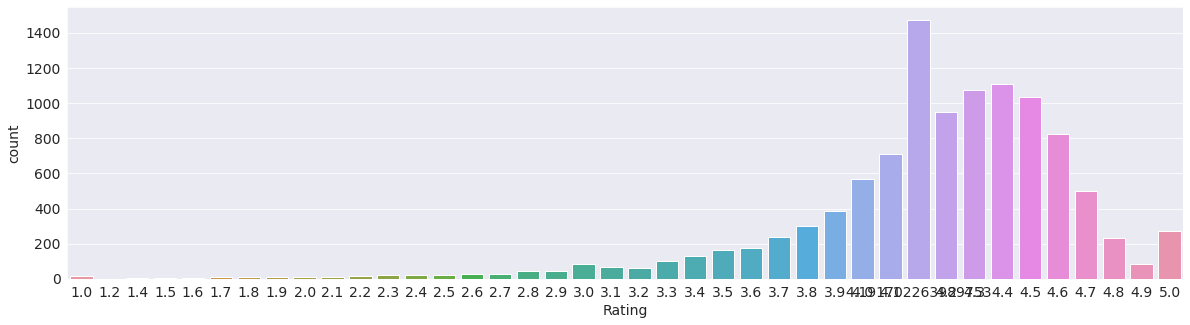

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(x ='Rating', data=df, ) 

# This is a benifit of choosing skeborn over matplotlib.
# We don't need to give labels for x and y.

In [23]:
# Some times it is hard to get exect values, So we can do following
df.Rating.value_counts()

4.19    1473
4.40    1108
4.30    1076
4.50    1037
4.20     952
4.60     823
4.10     708
4.00     568
4.70     499
3.90     386
3.80     303
5.00     274
3.70     239
4.80     234
3.60     174
3.50     163
3.40     128
3.30     102
4.90      87
3.00      83
3.10      69
3.20      64
2.90      45
2.80      42
2.70      25
2.60      25
2.50      21
2.30      20
2.40      19
1.00      16
2.20      14
1.90      13
2.00      12
1.80       8
1.70       8
2.10       8
1.60       4
1.50       3
1.40       3
1.20       1
Name: Rating, dtype: int64

Now See How many Unique Values are there in Content Rating

In [24]:
df['Content Rating'].nunique()

6

In [25]:
# Also see the name of that Content Ratings

df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

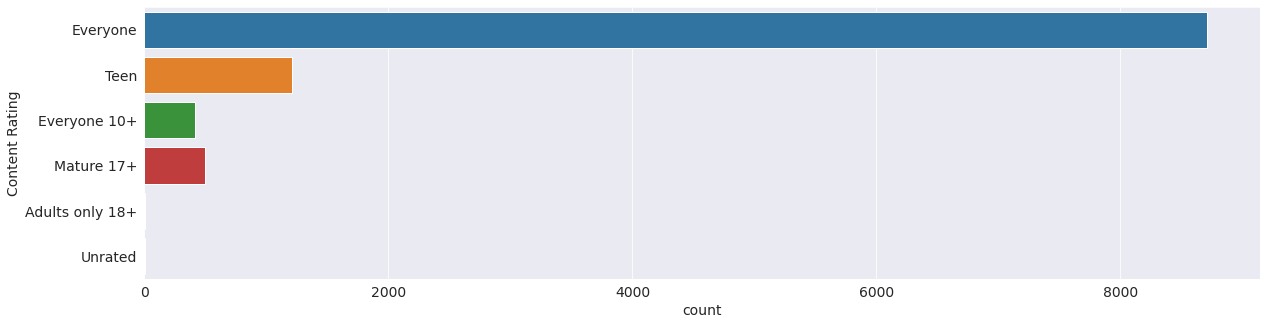

In [26]:
# Let's Plot it to see how many values in each.
plt.figure(figsize=(20,5))
sns.countplot(y= 'Content Rating', data= df)  # Made it horizontal by using y insted x.

Because of less Occurrence, Ther is no value visible in last two columns.

In [27]:
df[df['Content Rating'] == 'Adults only 18+']  # There is 3 data contains Adults only 18+ in Content Rating.


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
298,Manga Master - Best manga & comic reader,COMICS,4.60,"24,005.00",4.90,"500,000.00",Free,0.00,Adults only 18+,Comics,2018-07-04,4.1 and up
3043,DraftKings - Daily Fantasy Sports,SPORTS,4.50,"50,017.00","41,000,000.00","1,000,000.00",Free,0.00,Adults only 18+,Sports,2018-07-24,4.4 and up
6424,Manga Books,COMICS,3.80,"7,326.00",0.00,"500,000.00",Free,0.00,Adults only 18+,Comics,2018-08-03,Varies with device


In [28]:
df[df['Content Rating'] == 'Unrated']  # There are 2 data which are 'Unreted'

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
7312,Best CG Photography,FAMILY,4.19,1.00,2.50,500.00,Free,0.00,Unrated,Entertainment,2015-06-24,3.0 and up
8266,DC Universe Online Map,TOOLS,4.10,"1,186.00",6.40,"50,000.00",Free,0.00,Unrated,Tools,2012-02-27,2.3.3 and up


## Asking and Answering Questions

TODO - Let's Answer the question below.



#### Q1: Which type of gener's app are more in google playstore? 

In [30]:
top_10_gener = df['Genres'].value_counts().head(10)

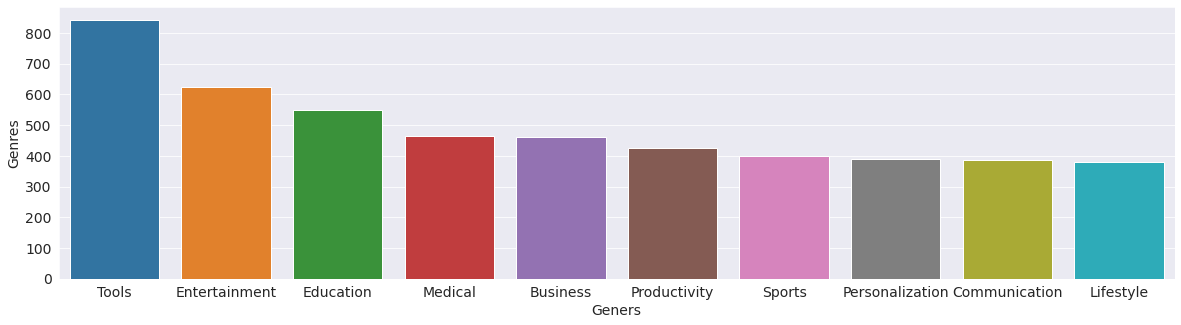

In [31]:
# Top ten geners are listed above let's plot them
plt.figure(figsize=(20,5))
plt.xlabel('Geners')
sns.barplot(x=top_10_gener.index, y= top_10_gener[:])

In [32]:
# Here Many apps belongs to Tools gener, See how many apps you are using from top 10 list.
df[df['Genres'] == 'Tools'].sort_values('Installs', ascending = False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
4150,Google,TOOLS,4.40,"8,021,623.00",0.00,"1,000,000,000.00",Free,0.00,Everyone,Tools,2018-08-03,Varies with device
3234,Google,TOOLS,4.40,"8,033,493.00",0.00,"1,000,000,000.00",Free,0.00,Everyone,Tools,2018-08-03,Varies with device
4147,Gboard - the Google Keyboard,TOOLS,4.20,"1,855,262.00",0.00,"500,000,000.00",Free,0.00,Everyone,Tools,2018-07-31,Varies with device
3235,Google Translate,TOOLS,4.40,"5,745,093.00",0.00,"500,000,000.00",Free,0.00,Everyone,Tools,2018-08-04,Varies with device
3255,SHAREit - Transfer & Share,TOOLS,4.60,"7,790,693.00","17,000,000.00","500,000,000.00",Free,0.00,Everyone,Tools,2018-07-30,4.1 and up
3326,Gboard - the Google Keyboard,TOOLS,4.20,"1,859,109.00",0.00,"500,000,000.00",Free,0.00,Everyone,Tools,2018-07-31,Varies with device
3907,Google Translate,TOOLS,4.40,"5,741,684.00",0.00,"500,000,000.00",Free,0.00,Everyone,Tools,2018-08-04,Varies with device
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,"42,916,526.00",0.00,"500,000,000.00",Free,0.00,Everyone,Tools,2018-08-03,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,"24,900,999.00",0.00,"500,000,000.00",Free,0.00,Everyone,Tools,2018-08-04,Varies with device
3265,Gboard - the Google Keyboard,TOOLS,4.20,"1,859,115.00",0.00,"500,000,000.00",Free,0.00,Everyone,Tools,2018-07-31,Varies with device


#### Q2: How many APPs are Free and How manny are Paid?

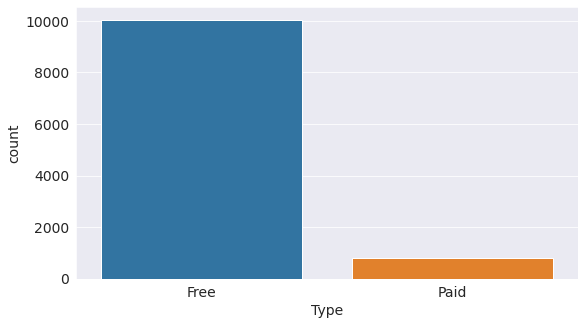

In [33]:
sns.countplot(x = 'Type', data= df)

In [34]:
df['Type'].value_counts()

Free    10038
Paid      799
Name: Type, dtype: int64

From above we know, 7.3% apps are Paid.
Free Apps - 10038
Paid Apps - 799
This is a Huge diffrence, Let's see For which category People want to pay, although alternative free app is availabel.


In [35]:
new_df = df[df['Type']== 'Paid']

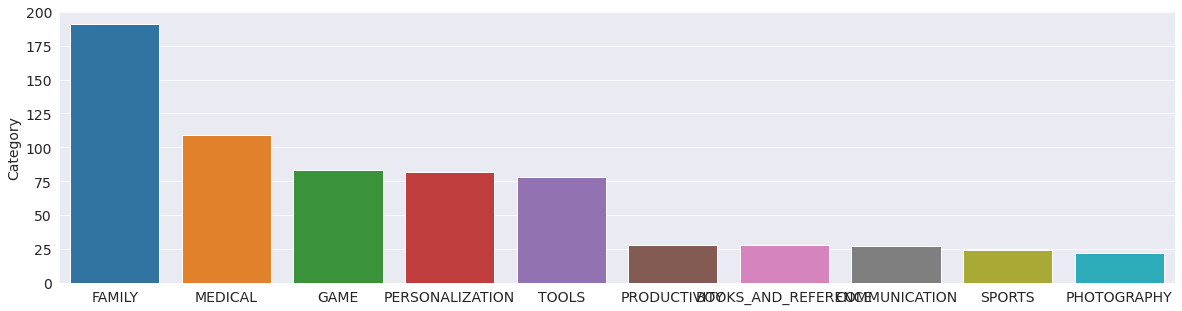

In [36]:
plt.figure(figsize=(20,5))
sns.barplot(x = new_df['Category'].value_counts().head(10).index, y = new_df['Category'].value_counts().head(10))

In [37]:
# Here we notice, who want to pay for apps. If it is under this categories, There are high chance that peple will pay for it.

# It is not EDA but It is an insteresting question.
Q - How Free Apps makes money?

Ans- Free apps make money using one of these 11 app monetization strategy: Advertising, Subscriptions, Selling Merchandise, In-App Purchases, Sponsorship, Referral Marketing, Collecting and Selling Data, Freemium Upsell, Physical Purchases, Transaction Fees, and Crowdfunding

Read more: https://www.spaceotechnologies.com/how-do-free-apps-make-money/

#### Q3:  Let's see number of installs and rating have any similarity?


In [38]:
# As we discussed early, There exits values 0 for install, So we should avoid them to get true result.
df_3 = df[df['Installs']> 0]

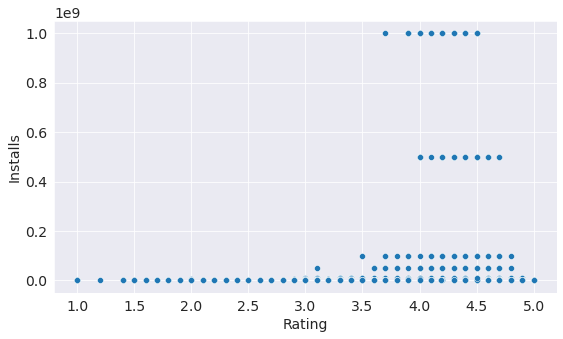

In [39]:
sns.scatterplot(y = 'Installs', x='Rating', data=df_3, palette="deep")

If we see graph we might think that, If we have removed 0 -Installs value, Why they here in Graph?
First thing  Installs(y_axis) are scalled in 1e9, and the value like 100(much smaller than 1e9) It appears as 0. 

We can also see the trande that, Which app is installed in 0.2 to 1 billion devices, have very good customer satisfactory.
It can be one of the reason that because of it's good services, It became popular among people.

#### Q4: TODO - Compare Total Installation of google apps and other apps.

We will look at installing of **Google apps** Vs **Other apps.**
It would be easy as we see in data every google apps `contains` a word 'Google'.

In [40]:
df_4 = df[df['App'].str.contains('Google')]

In [41]:
market_own_by_google = df_4['Installs'].sum()

In [42]:
market_own_by_others = df['Installs'].sum()- market_own_by_google

([<matplotlib.patches.Wedge at 0x7f8c4fe9c1d0>,
 [Text(-0.9072695803650359, 0.6219822413415449, 'Google'),
  Text(0.9072696094821252, -0.6219821988691897, 'Other')],
 [Text(-0.412395263802289, 0.2827192006097931, '80.9%'),
  Text(0.4123952770373296, -0.2827191813041771, '19.1%')])

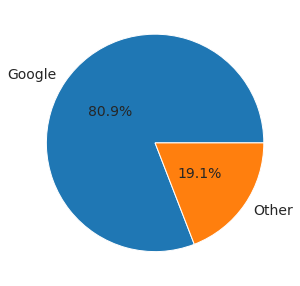

In [43]:
plt.pie(x=[market_own_by_others,market_own_by_google], autopct="%.1f%%", labels=['Google', 'Other'], pctdistance=0.5)

#### Above graph gives insights about, how google is ruling over the App Market.
#### It tells from total installs, 80.9% install done for googleApps from PlayStore.
#### Which might seems like `Monopoly` of Google.

## Inferences and Conclusion

###  In this notebook I try to use knowldge which I got from the course : ***Data Analysis with Python: Zero to Pandas*** from JOVIAN

## References and Future Work

**TODO** -  links to resources I found useful.

It is a good content about pandas from DataSchool : https://www.youtube.com/watch?v=yzIMircGU5I&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y